# Guia 2

## Ejercicio 1

Suponga que un sistema continuo de primer orden, tiene la siguiente función de transferencia: F(s) = 1/(s+a)
 
Al estimular el sistema con un paso unitario u(t), con condiciones iniciales nulas, la respuesta y(t) puede calcularse como Y(s)= F(s) U(s)
a.	Obtenga Y(s) y luego y(t).
b.	Analice y(t) y diga de qué valor dependerá dicha respuesta.
c.	Indique la estabilidad del sistema considerando el análisis del punto b y la función de transferencia inicial. 


NOTAS:
* The unit step function is also known as the Heaviside step function. We will see this function often in inverse laplace transforms. It is typeset as θ(t)  by sympy.

In [2]:
import sympy as sp
from sympy.plotting import plot

# Define symbolic variables
a, s, t = sp.symbols("a s t")

# Define system equations
F = 1/(s+a)
U = 1/s
Y=F*U

# Solve the system equations
y = sp.inverse_laplace_transform(Y, s, t)

# Remove θ(s) and simplify
y = sp.simplify(y/sp.Heaviside(t))
y

1/a - exp(-a*t)/a

In [3]:
# Substitute variables
testA = -1
y = y.subs(a, testA)
y

exp(t) - 1

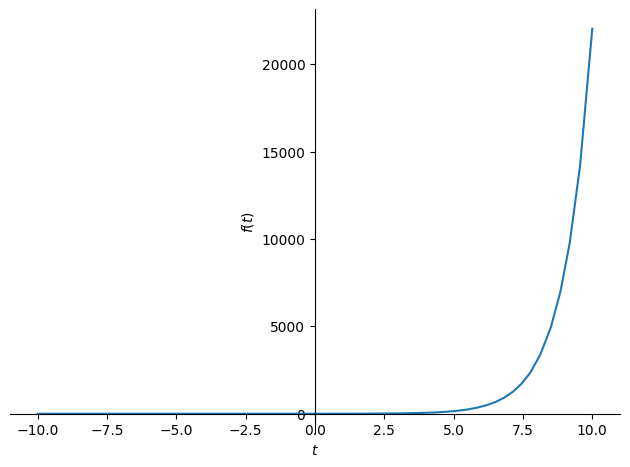

In [4]:
# Plot
p = plot(y)

## Ejercicio 2

Dado el error calcule el rango de la ganancia del lazo. Sea el sistema de realimentación unitaria, cuya planta tiene la transferencia:
k/((s+1)(s+2))

Halle el valor de K de manera que el error en estacionario sea e (∞) < 0.1.


In [5]:
k, s, t = sp.symbols("k s t")

G = k/((s+1)*(s+2))
G

k/((s + 1)*(s + 2))

In [6]:
expr = 2/(t+1)
# expr.subs(t, 1)
sp.limit(expr, t, sp.oo)

0

In [7]:
Kp = sp.limit(G, s, 0)
Kp

k/2

In [8]:
error = 1/(1+Kp)
error

1/(k/2 + 1)

In [9]:
sp.solve(error-0.1,k)

[18.0000000000000]

Por lo tanto, k >= 18

## Ejercicio 3

Dado el sistema calcule los errores. Considere el sistema con realimentación unitaria, cuya planta es:

G(s) = k(s+3.15)/(s*(s+1.5)*(s+0.5))

El rango de K para la estabilidad del sistema es: 0 < K < 1.304. Determine el error en estacionario cuando el sistema es excitado con diferentes tipos de señales de referencia, con la ganancia variando entre: 0 < K < 1.304.


In [10]:
G = k*(s+3.15)/(s*(s+1.5)*(s+0.5))
G

k*(s + 3.15)/(s*(s + 0.5)*(s + 1.5))

In [11]:
Kv = sp.limit(s*G, s, 0)
Kv

21*k/5

In [12]:
error = 1/Kv
print("error para k = 0.1 es ", error.subs(k,0.1))
print("error para k = 0.5 es ", error.subs(k,0.5))
print("error para k = 1   es ", error.subs(k,1))
print("error para k = 1.3 es ", error.subs(k,1.3))

error para k = 0.1 es  2.38095238095238
error para k = 0.5 es  0.476190476190476
error para k = 1   es  5/21
error para k = 1.3 es  0.183150183150183


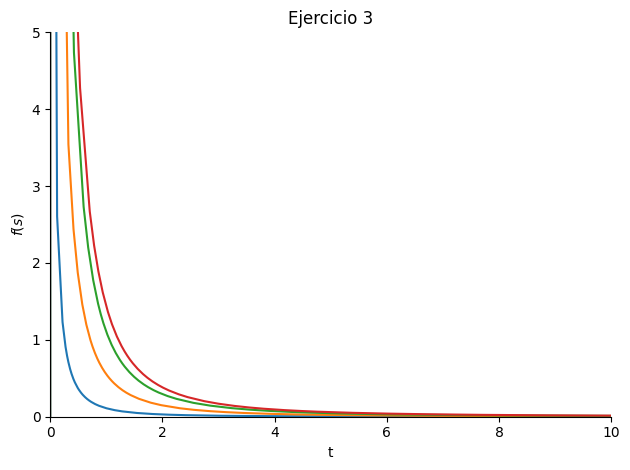

In [13]:
p1 = plot(G.subs(k,0.1),show=False,title="Ejercicio 3", xlabel="t",xlim=(0,10),ylim=(0,5))
p2 = plot(G.subs(k,0.5),show=False)
p3 = plot(G.subs(k,1),  show=False)
p4 = plot(G.subs(k,1.3),show=False)
p1.append(p2[0])
p1.append(p3[0])
p1.append(p4[0])
p1.show()

## Ejercicio 4

Verifique la estabilidad de los siguientes sistemas de acuerdo al criterio de Routh-Hurwitz.

a.  s3 - 3s2 + s +6 = 0

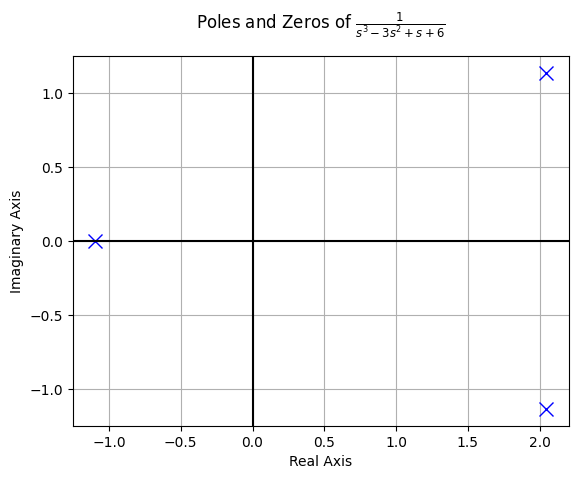

In [14]:
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot

denom = s**3 - 3*s**2 + s + 6
tf1 = TransferFunction(1,denom, s)
pole_zero_plot(tf1)   

b.	s3 + 6s2 + 11s + 6 = 0

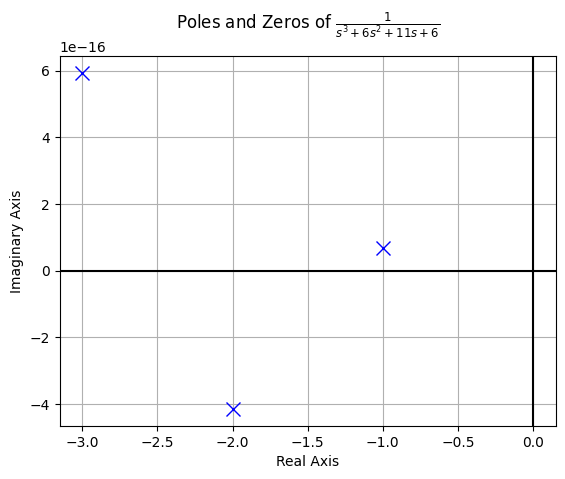

In [15]:
denom = s**3 + 6*s**2 + 11*s + 6
tf1 = TransferFunction(1,denom,s)
pole_zero_plot(tf1)


b.	s3 + 6s2 + 11s + 6 = 0

c.	s5 + 21s4 + 163s3 + 579s2 + 916s + 480 = 0

d.	s4 + 2s3 + 3s2 + s + 2 =0 


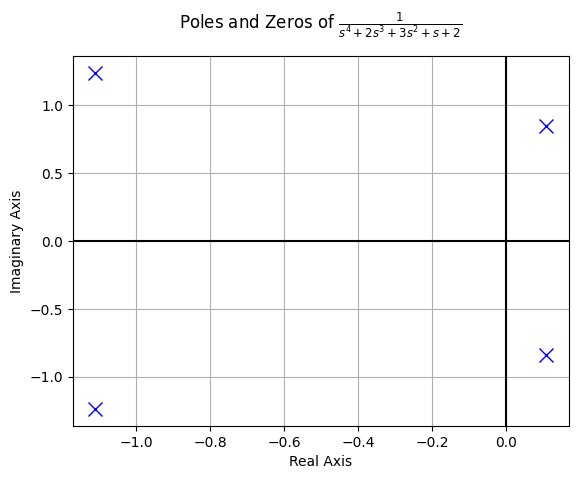

In [16]:
denom = s**4 + 2*s**3 + 3*s**2 + s + 2
tf1 = TransferFunction(1,denom,s)
pole_zero_plot(tf1)



e.	 . Determine el rango de K para que el sistema sea estable.

f.	s4 + 2s3 + 3s2 + 4s + 2 =0 

g.	2s7 + 3s6 + 2s5 + 3s4 + s3 + 2s2 + 3s + 2 =0 

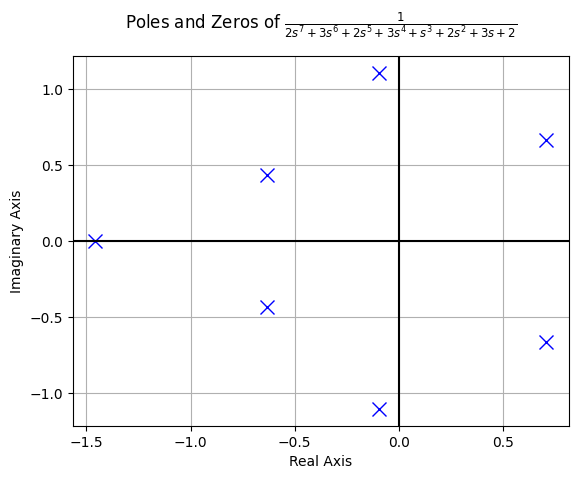

In [17]:
denom = 2*s**7 + 3*s**6 + 2*s**5 + 3*s**4 + s**3 + 2*s**2 + 3*s + 2
tf1 = TransferFunction(1,denom,s)
pole_zero_plot(tf1)

5. Encuentre el plano de fase del siguiente sistema:

x_1'(t) = 2*x_1(t)
x_2'(t) = -0.5*x_2(t)


### 5. Encuentre el plano de fase del siguiente sistema:

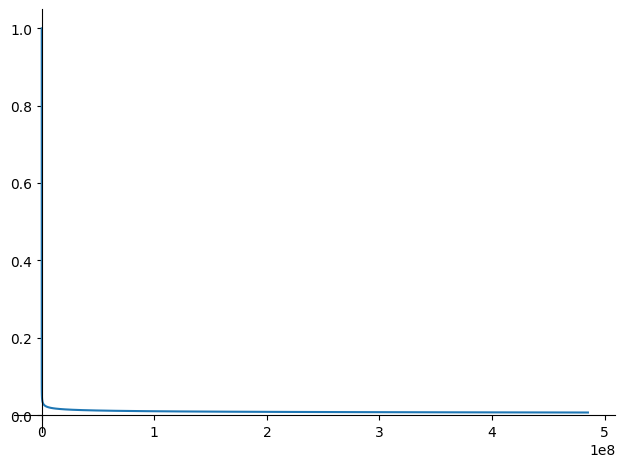

In [21]:
x1 = sp.exp(2*t)
x2 = sp.exp(-0.5*t)

sp.plot_parametric(x1, x2, (t,0,10))

# Parte 3

## Ejercicio A: Plano de fase

In [19]:

f = 10
w = 2*sp.pi*f
Fs = 32000
tf = 1.5

x = 4*sp.sin(w*t) *sp.exp(-5*t)
dx = sp.diff(x, t)
dx


-20*exp(-5*t)*sin(20*pi*t) + 80*pi*exp(-5*t)*cos(20*pi*t)

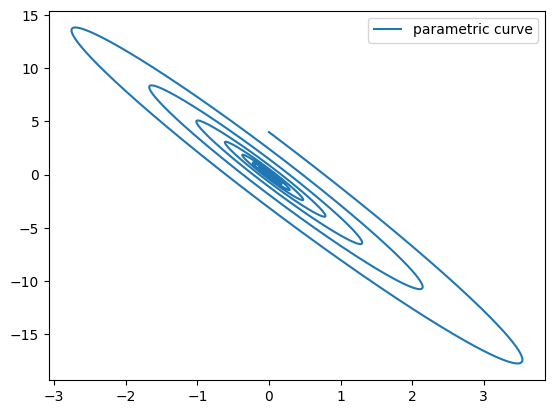

In [20]:
import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure().add_subplot()

f=10 #frecuencia de la señal en Hz 
w=2*np.pi*f # Frecuencia de la señal en rad/s
Fs=32000 # Frecuencia de muestreo en Hz
tf=1.5; # Duración de la simulación

# Prepare arrays x, y, z
theta = np.linspace(0, tf, Fs)
# x = np.sin(theta)
x = 4*np.sin(w*theta)*np.exp(-5*theta)
# y = np.cos(theta)
y = 4*np.exp(-5*theta)*(-5*np.sin(w*theta)+np.cos(w*theta))

ax.plot(x, y, label='parametric curve')
ax.legend()

plt.show()